<a href="https://colab.research.google.com/github/Kalazclint/River_gage_height_forecasting/blob/main/Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/dataset_2015_2020.xlsx'
data = pd.read_excel(path)
data.head()

,Date/Time,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,gage_height_ft_sensor_07380120
0,2015-01-01 00:00:00-06:00,13.79,1.91,17.87,1.70
1,2015-01-01 00:15:00-06:00,13.79,1.91,17.85,1.71
2,2015-01-01 00:30:00-06:00,13.79,1.90,17.86,1.72
3,2015-01-01 00:45:00-06:00,13.79,1.90,17.85,1.72
4,2015-01-01 01:00:00-06:00,13.79,1.90,17.85,1.72


In [ ]:
data_test = data.iloc[168344:].reset_index()
data_test = data_test.iloc[8:-99].reset_index()

In [ ]:
data_test

,level_0,index,Date/Time,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,gage_height_ft_sensor_07380120
0,8,168352,2019-10-20 16:15:00-06:00,13.30,1.05,17.50,3.49
1,9,168353,2019-10-20 16:30:00-06:00,13.30,1.05,17.50,3.49
2,10,168354,2019-10-20 16:45:00-06:00,13.30,1.05,17.50,3.50
3,11,168355,2019-10-20 17:00:00-06:00,13.30,1.05,17.50,3.50
4,12,168356,2019-10-20 17:15:00-06:00,13.30,1.05,17.49,3.50
...,...,...,...,...,...,...,...
41975,41983,210327,2020-12-30 22:00:00-06:00,13.28,1.44,18.68,1.87
41976,41984,210328,2020-12-30 22:15:00-06:00,13.28,1.44,18.68,1.86
41977,41985,210329,2020-12-30 22:30:00-06:00,13.27,1.43,18.68,1.85
41978,41986,210330,2020-12-30 22:45:00-06:00,13.27,1.43,18.67,1.84


In [ ]:
path2 = '/content/drive/My Drive/LSTM_GRU_CONVLSTM.csv'
Lstm_file = pd.read_csv(path2)
Lstm_file.head()

,GRU,LSTM,ConvLSTM,gage_height_ft_sensor_07380120
0,2.080717,2.059395,2.045217,3.44
1,2.077913,2.057127,2.042862,3.43
2,2.074592,2.055823,2.040255,3.45
3,2.074592,2.055823,2.040255,3.44
4,2.075110,2.054862,2.040509,3.47


In [ ]:
path3 = '/content/drive/My Drive/Wavenet.csv'
wavenet = pd.read_csv(path3)
wavenet.head()

,gage_height_ft_sensor_07380120_orig,Wavenet_pred
0,3.49,3.446817
1,3.49,3.471329
2,3.50,3.460643
3,3.50,3.460528
4,3.50,3.472535


In [ ]:
Lstm_file = Lstm_file.iloc[8:-99].reset_index()
Lstm_file


,index,GRU,LSTM,ConvLSTM,gage_height_ft_sensor_07380120
0,8,2.076169,2.055587,2.041166,3.49
1,9,2.076169,2.055587,2.041166,3.49
2,10,2.076169,2.055587,2.041166,3.50
3,11,2.076169,2.055587,2.041166,3.50
4,12,2.073367,2.053324,2.038815,3.50
...,...,...,...,...,...
41975,41983,2.284486,2.272740,2.225493,1.87
41976,41984,2.284486,2.272740,2.225493,1.86
41977,41985,2.289066,2.272975,2.222701,1.85
41978,41986,2.286116,2.270915,2.221256,1.84


In [ ]:
Lstm_file

,GRU,LSTM,ConvLSTM,gage_height_ft_sensor_07380120
8,2.076169,2.055587,2.041166,3.49
9,2.076169,2.055587,2.041166,3.49
10,2.076169,2.055587,2.041166,3.50
11,2.076169,2.055587,2.041166,3.50
12,2.073367,2.053324,2.038815,3.50
...,...,...,...,...
41983,2.284486,2.272740,2.225493,1.87
41984,2.284486,2.272740,2.225493,1.86
41985,2.289066,2.272975,2.222701,1.85
41986,2.286116,2.270915,2.221256,1.84


In [ ]:
wavenet

,gage_height_ft_sensor_07380120_orig,Wavenet_pred
0,3.49,3.446817
1,3.49,3.471329
2,3.50,3.460643
3,3.50,3.460528
4,3.50,3.472535
...,...,...
41975,1.87,1.920986
41976,1.86,1.912502
41977,1.85,1.903690
41978,1.84,1.891164


In [ ]:
concatenated_df = pd.concat([Lstm_file, wavenet], axis=1)

In [ ]:
concatenated_df

,index,GRU,LSTM,ConvLSTM,gage_height_ft_sensor_07380120,gage_height_ft_sensor_07380120_orig,Wavenet_pred
0,8,2.076169,2.055587,2.041166,3.49,3.49,3.446817
1,9,2.076169,2.055587,2.041166,3.49,3.49,3.471329
2,10,2.076169,2.055587,2.041166,3.50,3.50,3.460643
3,11,2.076169,2.055587,2.041166,3.50,3.50,3.460528
4,12,2.073367,2.053324,2.038815,3.50,3.50,3.472535
...,...,...,...,...,...,...,...
41975,41983,2.284486,2.272740,2.225493,1.87,1.87,1.920986
41976,41984,2.284486,2.272740,2.225493,1.86,1.86,1.912502
41977,41985,2.289066,2.272975,2.222701,1.85,1.85,1.903690
41978,41986,2.286116,2.270915,2.221256,1.84,1.84,1.891164


In [ ]:
final_df = pd.concat([data_test, concatenated_df], axis=1)

In [ ]:
final_df

,level_0,index,Date/Time,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,gage_height_ft_sensor_07380120,index,GRU,LSTM,ConvLSTM,gage_height_ft_sensor_07380120,gage_height_ft_sensor_07380120_orig,Wavenet_pred
0,8,168352,2019-10-20 16:15:00-06:00,13.30,1.05,17.50,3.49,8,2.076169,2.055587,2.041166,3.49,3.49,3.446817
1,9,168353,2019-10-20 16:30:00-06:00,13.30,1.05,17.50,3.49,9,2.076169,2.055587,2.041166,3.49,3.49,3.471329
2,10,168354,2019-10-20 16:45:00-06:00,13.30,1.05,17.50,3.50,10,2.076169,2.055587,2.041166,3.50,3.50,3.460643
3,11,168355,2019-10-20 17:00:00-06:00,13.30,1.05,17.50,3.50,11,2.076169,2.055587,2.041166,3.50,3.50,3.460528
4,12,168356,2019-10-20 17:15:00-06:00,13.30,1.05,17.49,3.50,12,2.073367,2.053324,2.038815,3.50,3.50,3.472535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41975,41983,210327,2020-12-30 22:00:00-06:00,13.28,1.44,18.68,1.87,41983,2.284486,2.272740,2.225493,1.87,1.87,1.920986
41976,41984,210328,2020-12-30 22:15:00-06:00,13.28,1.44,18.68,1.86,41984,2.284486,2.272740,2.225493,1.86,1.86,1.912502
41977,41985,210329,2020-12-30 22:30:00-06:00,13.27,1.43,18.68,1.85,41985,2.289066,2.272975,2.222701,1.85,1.85,1.903690
41978,41986,210330,2020-12-30 22:45:00-06:00,13.27,1.43,18.67,1.84,41986,2.286116,2.270915,2.221256,1.84,1.84,1.891164


In [ ]:
final_df.drop(['level_0','index','gage_height_ft_sensor_07380120'], axis=1, inplace=True)



In [ ]:
final_df

,Date/Time,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,GRU,LSTM,ConvLSTM,gage_height_ft_sensor_07380120_orig,Wavenet_pred
0,2019-10-20 16:15:00-06:00,13.30,1.05,17.50,2.076169,2.055587,2.041166,3.49,3.446817
1,2019-10-20 16:30:00-06:00,13.30,1.05,17.50,2.076169,2.055587,2.041166,3.49,3.471329
2,2019-10-20 16:45:00-06:00,13.30,1.05,17.50,2.076169,2.055587,2.041166,3.50,3.460643
3,2019-10-20 17:00:00-06:00,13.30,1.05,17.50,2.076169,2.055587,2.041166,3.50,3.460528
4,2019-10-20 17:15:00-06:00,13.30,1.05,17.49,2.073367,2.053324,2.038815,3.50,3.472535
...,...,...,...,...,...,...,...,...,...
41975,2020-12-30 22:00:00-06:00,13.28,1.44,18.68,2.284486,2.272740,2.225493,1.87,1.920986
41976,2020-12-30 22:15:00-06:00,13.28,1.44,18.68,2.284486,2.272740,2.225493,1.86,1.912502
41977,2020-12-30 22:30:00-06:00,13.27,1.43,18.68,2.289066,2.272975,2.222701,1.85,1.903690
41978,2020-12-30 22:45:00-06:00,13.27,1.43,18.67,2.286116,2.270915,2.221256,1.84,1.891164


In [ ]:
final_df['Date/Time'] = pd.to_datetime(final_df['Date/Time'])

In [ ]:
#Resetting Index to Date data
final_df.set_index('Date/Time', inplace=True)

In [ ]:
final_df

,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,GRU,LSTM,ConvLSTM,gage_height_ft_sensor_07380120_orig,Wavenet_pred
Date/Time,,,,,,,,
2019-10-20 16:15:00-06:00,13.30,1.05,17.50,2.076169,2.055587,2.041166,3.49,3.446817
2019-10-20 16:30:00-06:00,13.30,1.05,17.50,2.076169,2.055587,2.041166,3.49,3.471329
2019-10-20 16:45:00-06:00,13.30,1.05,17.50,2.076169,2.055587,2.041166,3.50,3.460643
2019-10-20 17:00:00-06:00,13.30,1.05,17.50,2.076169,2.055587,2.041166,3.50,3.460528
2019-10-20 17:15:00-06:00,13.30,1.05,17.49,2.073367,2.053324,2.038815,3.50,3.472535
...,...,...,...,...,...,...,...,...
2020-12-30 22:00:00-06:00,13.28,1.44,18.68,2.284486,2.272740,2.225493,1.87,1.920986
2020-12-30 22:15:00-06:00,13.28,1.44,18.68,2.284486,2.272740,2.225493,1.86,1.912502
2020-12-30 22:30:00-06:00,13.27,1.43,18.68,2.289066,2.272975,2.222701,1.85,1.903690


In [ ]:
df = final_df[['gage_height_ft_sensor_07380120_orig','LSTM','ConvLSTM','GRU','Wavenet_pred']]

In [ ]:
df

,gage_height_ft_sensor_07380120_orig,LSTM,ConvLSTM,GRU,Wavenet_pred
Date/Time,,,,,
2019-10-20 16:15:00-06:00,3.49,2.055587,2.041166,2.076169,3.446817
2019-10-20 16:30:00-06:00,3.49,2.055587,2.041166,2.076169,3.471329
2019-10-20 16:45:00-06:00,3.50,2.055587,2.041166,2.076169,3.460643
2019-10-20 17:00:00-06:00,3.50,2.055587,2.041166,2.076169,3.460528
2019-10-20 17:15:00-06:00,3.50,2.053324,2.038815,2.073367,3.472535
...,...,...,...,...,...
2020-12-30 22:00:00-06:00,1.87,2.272740,2.225493,2.284486,1.920986
2020-12-30 22:15:00-06:00,1.86,2.272740,2.225493,2.284486,1.912502
2020-12-30 22:30:00-06:00,1.85,2.272975,2.222701,2.289066,1.903690


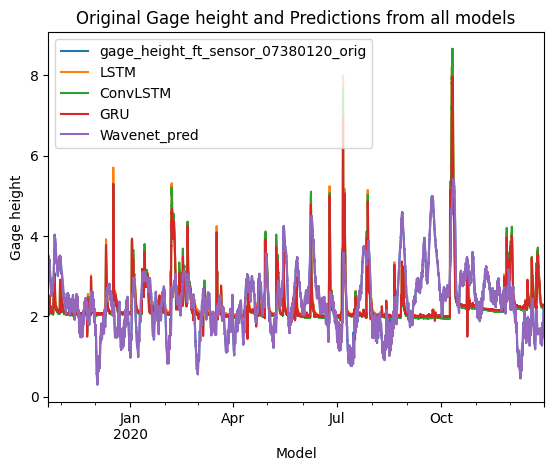

In [ ]:
fig, ax = plt.subplots()
df.plot(ax=ax, kind='line', legend=True)
ax.set_title('Original Gage height and Predictions from all models')
ax.set_xlabel('Model')
ax.set_ylabel('Gage height')
plt.show()